# Mental health prediction: изучениe эффективности методов

## 1. Загрузка и анализ начальных данных

### Загрузка модулей

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

### Загрузка начальных данных

In [2]:
import yaml

with open('C:/Users/Zver/Desktop/uni/AIF/hw2/config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

In [3]:
train_data = pd.read_csv(cfg['mental_health']['train'])
test_data = pd.read_csv(cfg['mental_health']['test'])

TARGET = 'Depression'
ID = 'id'

In [4]:
initial_test_data = test_data.copy()

### Начальный анализ

In [5]:
print("Тренировочный датасет:")
train_data.info()

Тренировочный датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   1891 non-null   object 
 1   Gender                                 1891 non-null   object 
 2   Age                                    1891 non-null   int64  
 3   City                                   1891 non-null   object 
 4   Working Professional or Student        1891 non-null   object 
 5   Profession                             1380 non-null   object 
 6   Academic Pressure                      382 non-null    float64
 7   Work Pressure                          1509 non-null   float64
 8   CGPA                                   382 non-null    float64
 9   Study Satisfaction                     382 non-null    float64
 10  Job Satisfaction                       1509 non-n

In [6]:
print("\nТестовый датасет:")
test_data.info()


Тестовый датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   665 non-null    object 
 1   Gender                                 665 non-null    object 
 2   Age                                    665 non-null    int64  
 3   City                                   665 non-null    object 
 4   Working Professional or Student        665 non-null    object 
 5   Profession                             503 non-null    object 
 6   Academic Pressure                      120 non-null    float64
 7   Work Pressure                          545 non-null    float64
 8   CGPA                                   120 non-null    float64
 9   Study Satisfaction                     120 non-null    float64
 10  Job Satisfaction                       545 non-null    

## Анализ и подготовка датасета


In [7]:
train_data.columns = [col.replace(' ', '_') for col in train_data.columns]
test_data.columns = [col.replace(' ', '_') for col in test_data.columns]

initial_test_data = test_data.copy()
train_data.columns

Index(['Name', 'Gender', 'Age', 'City', 'Working_Professional_or_Student',
       'Profession', 'Academic_Pressure', 'Work_Pressure', 'CGPA',
       'Study_Satisfaction', 'Job_Satisfaction', 'Sleep_Duration',
       'Dietary_Habits', 'Degree', 'Have_you_ever_had_suicidal_thoughts_?',
       'Work/Study_Hours', 'Financial_Stress',
       'Family_History_of_Mental_Illness', 'Depression', 'id'],
      dtype='object')

In [8]:
print(train_data.dtypes,"\n\n",test_data.dtypes)

Name                                      object
Gender                                    object
Age                                        int64
City                                      object
Working_Professional_or_Student           object
Profession                                object
Academic_Pressure                        float64
Work_Pressure                            float64
CGPA                                     float64
Study_Satisfaction                       float64
Job_Satisfaction                         float64
Sleep_Duration                            object
Dietary_Habits                            object
Degree                                    object
Have_you_ever_had_suicidal_thoughts_?     object
Work/Study_Hours                           int64
Financial_Stress                           int64
Family_History_of_Mental_Illness          object
Depression                                 int64
id                                         int64
dtype: object 

 Nam

In [9]:
print(train_data['Sleep_Duration'].unique())
print(test_data['Sleep_Duration'].unique())

['Less than 5 hours' '7-8 hours' '5-6 hours' 'More than 8 hours']
['Less than 5 hours' '7-8 hours' '5-6 hours' 'More than 8 hours']


In [10]:
sleep={
        "More than 8 hours":9,
        'Less than 5 hours':4,
        '5-6 hours':5.5,
        '7-8 hours':7.5
}

train_data['Sleep_Duration'] = train_data['Sleep_Duration'].map(sleep)
test_data['Sleep_Duration'] = test_data['Sleep_Duration'].map(sleep)

sleep_med=train_data['Sleep_Duration'].median()
train_data.fillna({'Sleep_Duration':sleep_med}, inplace=True)
test_data.fillna({'Sleep_Duration':sleep_med}, inplace=True)

In [11]:
print('Gender:',train_data['Gender'].unique())
print('Thoughts:',train_data['Have_you_ever_had_suicidal_thoughts_?'].unique())
print('Working:',train_data['Working_Professional_or_Student'].unique())
print('History:',train_data['Family_History_of_Mental_Illness'].unique())

print('Gender:',test_data['Gender'].unique())
print('Thoughts:',test_data['Have_you_ever_had_suicidal_thoughts_?'].unique())
print('Working:',test_data['Working_Professional_or_Student'].unique())
print('History:',test_data['Family_History_of_Mental_Illness'].unique())

Gender: ['Male' 'Female']
Thoughts: ['Yes' 'No']
Working: ['Working Professional' 'Student']
History: ['Yes' 'No']
Gender: ['Male' 'Female']
Thoughts: ['No' 'Yes']
Working: ['Working Professional' 'Student']
History: ['No' 'Yes']


In [12]:
gender={
    'Male':0,
    'Female':1,
}

work={
    'Working Professional':1,
    'Student':0,
}

Thoughts={
    'No':0,
    'Yes':1,
}

History={
    'No':0,
    'Yes':1,
}

train_data['Working_Professional_or_Student'] = train_data['Working_Professional_or_Student'].map(work)
test_data['Working_Professional_or_Student'] = test_data['Working_Professional_or_Student'].map(work)

train_data['Gender'] = train_data['Gender'].map(gender)
test_data['Gender'] = test_data['Gender'].map(gender)

train_data['Have_you_ever_had_suicidal_thoughts_?'] = train_data['Have_you_ever_had_suicidal_thoughts_?'].map(Thoughts)
test_data['Have_you_ever_had_suicidal_thoughts_?'] = test_data['Have_you_ever_had_suicidal_thoughts_?'].map(Thoughts)

train_data['Family_History_of_Mental_Illness'] = train_data['Family_History_of_Mental_Illness'].map(History)
test_data['Family_History_of_Mental_Illness'] = test_data['Family_History_of_Mental_Illness'].map(History)

print('Gender:',train_data['Gender'].unique(),'Working:',train_data['Working_Professional_or_Student'].unique(),'Thoughts:',train_data['Have_you_ever_had_suicidal_thoughts_?'].unique(),'History:',train_data['Family_History_of_Mental_Illness'].unique())

Gender: [0 1] Working: [1 0] Thoughts: [1 0] History: [1 0]


In [13]:
print(train_data['Dietary_Habits'].unique())
print(test_data['Dietary_Habits'].unique())

['Unhealthy' 'Healthy' 'Moderate']
['Healthy' 'Moderate' 'Unhealthy']


In [14]:
diet={
    'Healthy':1,
    'Moderate':2,
    'Unhealthy':3,
}

train_data['Dietary_Habits'] = train_data['Dietary_Habits'].map(diet)
test_data['Dietary_Habits'] = test_data['Dietary_Habits'].map(diet)

train_data['Dietary_Habits'].unique()

array([3, 1, 2])

In [15]:
print(train_data.isnull().sum(),"\n\n",test_data.isnull().sum())

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working_Professional_or_Student             0
Profession                                511
Academic_Pressure                        1509
Work_Pressure                             382
CGPA                                     1509
Study_Satisfaction                       1509
Job_Satisfaction                          382
Sleep_Duration                              0
Dietary_Habits                              0
Degree                                      0
Have_you_ever_had_suicidal_thoughts_?       0
Work/Study_Hours                            0
Financial_Stress                            0
Family_History_of_Mental_Illness            0
Depression                                  0
id                                          0
dtype: int64 

 Name                                       0
Gender             

In [16]:
nanlist=['Profession','Academic_Pressure','Work_Pressure','CGPA','Study_Satisfaction','Job_Satisfaction','Dietary_Habits','Degree','Financial_Stress']

In [17]:
for col in nanlist:
    napercent=(train_data[col].isna().sum()/train_data[col].shape[0])*100
    print(f"{col} is %{napercent:.2f} null")

Profession is %27.02 null
Academic_Pressure is %79.80 null
Work_Pressure is %20.20 null
CGPA is %79.80 null
Study_Satisfaction is %79.80 null
Job_Satisfaction is %20.20 null
Dietary_Habits is %0.00 null
Degree is %0.00 null
Financial_Stress is %0.00 null


In [18]:
#'Work_Hours','Study_Hours', 'Work_Stress','Academic_Stress'
nanlist=['Profession','Academic_Pressure','Work_Pressure','CGPA','Study_Satisfaction','Job_Satisfaction','Dietary_Habits','Degree','Financial_Stress']

In [19]:
for col in nanlist:
    print(f"{col}:",train_data[col].dtype)

Profession: object
Academic_Pressure: float64
Work_Pressure: float64
CGPA: float64
Study_Satisfaction: float64
Job_Satisfaction: float64
Dietary_Habits: int64
Degree: object
Financial_Stress: int64


In [20]:
train_data.fillna({'Degree': 'Unknown', 'Profession': 'Unknown'}, inplace=True)
test_data.fillna({'Degree': 'Unknown', 'Profession': 'Unknown'}, inplace=True)

print(train_data['Profession'].unique())
print(test_data['Profession'].unique())

['Teacher' 'Unknown' 'Data Scientist' 'Researcher' 'Civil Engineer'
 'HR Manager' 'Business Analyst' 'Content Writer' 'Manager' 'Lawyer'
 'Travel Consultant' 'Digital Marketer' 'Electrician' 'Accountant'
 'Consultant' 'Chemist' 'Pilot' 'Mechanical Engineer' 'Marketing Manager'
 'Research Analyst' 'Plumber' 'Pharmacist' 'Architect' 'Chef' 'Doctor'
 'Educational Consultant' 'UX/UI Designer' 'Finanancial Analyst'
 'Sales Executive' 'Judge' 'Financial Analyst' 'Entrepreneur'
 'Software Engineer' 'Customer Support' 'Graphic Designer'
 'Investment Banker']
['Content Writer' 'Plumber' 'Digital Marketer' 'Marketing Manager'
 'Travel Consultant' 'Unknown' 'Researcher' 'Pharmacist' 'HR Manager'
 'Educational Consultant' 'Entrepreneur' 'Consultant' 'Teacher' 'Chef'
 'Lawyer' 'Financial Analyst' 'Data Scientist' 'Sales Executive'
 'UX/UI Designer' 'Customer Support' 'Pilot' 'Software Engineer' 'Judge'
 'Business Analyst' 'Manager' 'Finanancial Analyst' 'Research Analyst'
 'Architect' 'Chemist' 'Ci

In [21]:
from sklearn.model_selection import StratifiedKFold
from category_encoders import TargetEncoder
import pandas as pd

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

train_data_encoded = train_data.copy()

target_encoder = TargetEncoder(cols=['Profession', 'Degree', 'Name', 'City'])

target_encoder.fit(train_data[['Profession', 'Degree', 'Name', 'City']], train_data['Depression'])

train_data[['Profession', 'Degree', 'Name', 'City']] = target_encoder.transform(train_data[['Profession', 'Degree', 'Name', 'City']])

test_data_encoded = test_data.copy()
test_data[['Profession', 'Degree', 'Name', 'City']] = target_encoder.transform(test_data[['Profession', 'Degree', 'Name', 'City']])

In [22]:
for col in nanlist:
    med=train_data[col].median()
    train_data.fillna({col:med}, inplace=True)
    test_data.fillna({col:med}, inplace=True)

print(train_data.isnull().sum(),"\n\n",test_data.isnull().sum())

Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working_Professional_or_Student          0
Profession                               0
Academic_Pressure                        0
Work_Pressure                            0
CGPA                                     0
Study_Satisfaction                       0
Job_Satisfaction                         0
Sleep_Duration                           0
Dietary_Habits                           0
Degree                                   0
Have_you_ever_had_suicidal_thoughts_?    0
Work/Study_Hours                         0
Financial_Stress                         0
Family_History_of_Mental_Illness         0
Depression                               0
id                                       0
dtype: int64 

 Name                                     0
Gender                                   0
Age                                   

In [23]:
train_data.head(10)

,Name,Gender,Age,City,Working_Professional_or_Student,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_?,Work/Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression,id
0,0.223858,0,47,0.167040,1,0.085366,3.0,1.0,7.565,3.0,5.0,4.0,3,0.161899,1,11,5,1,0,1
1,0.174633,1,25,0.136780,0,0.461840,3.0,3.0,6.590,1.0,3.0,7.5,1,0.137191,0,9,3,0,0,2
2,0.174633,0,56,0.196783,1,0.149574,3.0,3.0,7.565,3.0,2.0,7.5,2,0.202732,0,2,4,1,0,3
3,0.181940,1,24,0.150507,0,0.461840,2.0,3.0,5.770,2.0,3.0,5.5,2,0.179915,1,5,3,0,1,4
4,0.189204,0,55,0.105142,1,0.058847,3.0,1.0,7.565,3.0,2.0,7.5,3,0.137191,1,4,4,0,0,5
5,0.210966,0,21,0.161180,1,0.121410,3.0,5.0,7.565,3.0,2.0,7.5,2,0.178562,0,11,3,0,1,6
6,0.175929,1,50,0.150507,1,0.088220,3.0,3.0,7.565,3.0,4.0,4.0,1,0.099662,0,0,2,0,0,7
7,0.241867,1,20,0.136780,1,0.461840,3.0,5.0,7.565,3.0,5.0,5.5,3,0.442308,1,12,4,0,1,8
8,0.190272,1,33,0.212546,1,0.082733,3.0,5.0,7.565,3.0,4.0,9.0,2,0.137191,1,3,3,0,0,9
9,0.210966,1,21,0.128904,0,0.461840,5.0,3.0,6.860,4.0,3.0,9.0,3,0.159112,0,0,5,0,1,10


In [24]:
test_data.head(10)

,Name,Gender,Age,City,Working_Professional_or_Student,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_?,Work/Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,id
0,0.140374,0,59,0.212546,1,0.035509,3.0,1.0,7.565,3.0,1.0,4.0,1,0.099662,0,10,1,0,1
1,0.194830,0,45,0.196783,1,0.100543,3.0,5.0,7.565,3.0,1.0,7.5,2,0.131915,1,0,1,1,2
2,0.182187,0,42,0.161180,1,0.115064,3.0,3.0,7.565,3.0,4.0,5.5,1,0.153974,0,12,2,1,3
3,0.136961,0,34,0.230708,1,0.104534,3.0,4.0,7.565,3.0,2.0,7.5,3,0.172852,0,12,5,0,4
4,0.223764,1,36,0.212546,1,0.100543,3.0,4.0,7.565,3.0,2.0,7.5,2,0.178562,1,7,3,1,5
5,0.165895,1,41,0.138812,1,0.035509,3.0,4.0,7.565,3.0,3.0,4.0,3,0.150507,0,4,3,1,6
6,0.226304,0,59,0.136780,1,0.068709,3.0,5.0,7.565,3.0,2.0,5.5,3,0.095358,0,2,2,0,7
7,0.170641,0,25,0.193322,0,0.461840,1.0,3.0,7.210,3.0,3.0,5.5,3,0.179915,1,10,4,0,8
8,0.175929,0,48,0.230708,1,0.115064,3.0,1.0,7.565,3.0,4.0,4.0,1,0.172852,1,9,1,1,9
9,0.182187,1,34,0.161180,1,0.100543,3.0,5.0,7.565,3.0,1.0,9.0,1,0.159112,0,5,4,0,10


In [25]:
train_ids = train_data[ID]
test_ids = test_data[ID]

train_data = train_data.drop(ID, axis=1)
test_data = test_data.drop(ID, axis=1)

y = train_data[TARGET]

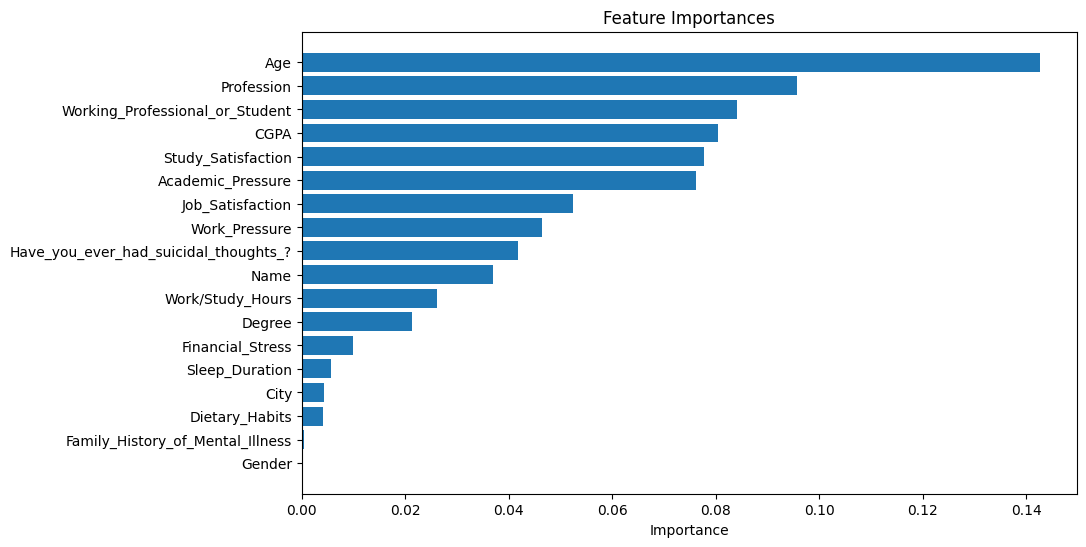

In [26]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(train_data.drop('Depression', axis=1), train_data['Depression'])
mi_series = pd.Series(mi, index=train_data.drop('Depression', axis=1).columns)

feature_importance = pd.DataFrame({
    'Feature': train_data.drop('Depression', axis=1).columns,
    'Importance': mi_series
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

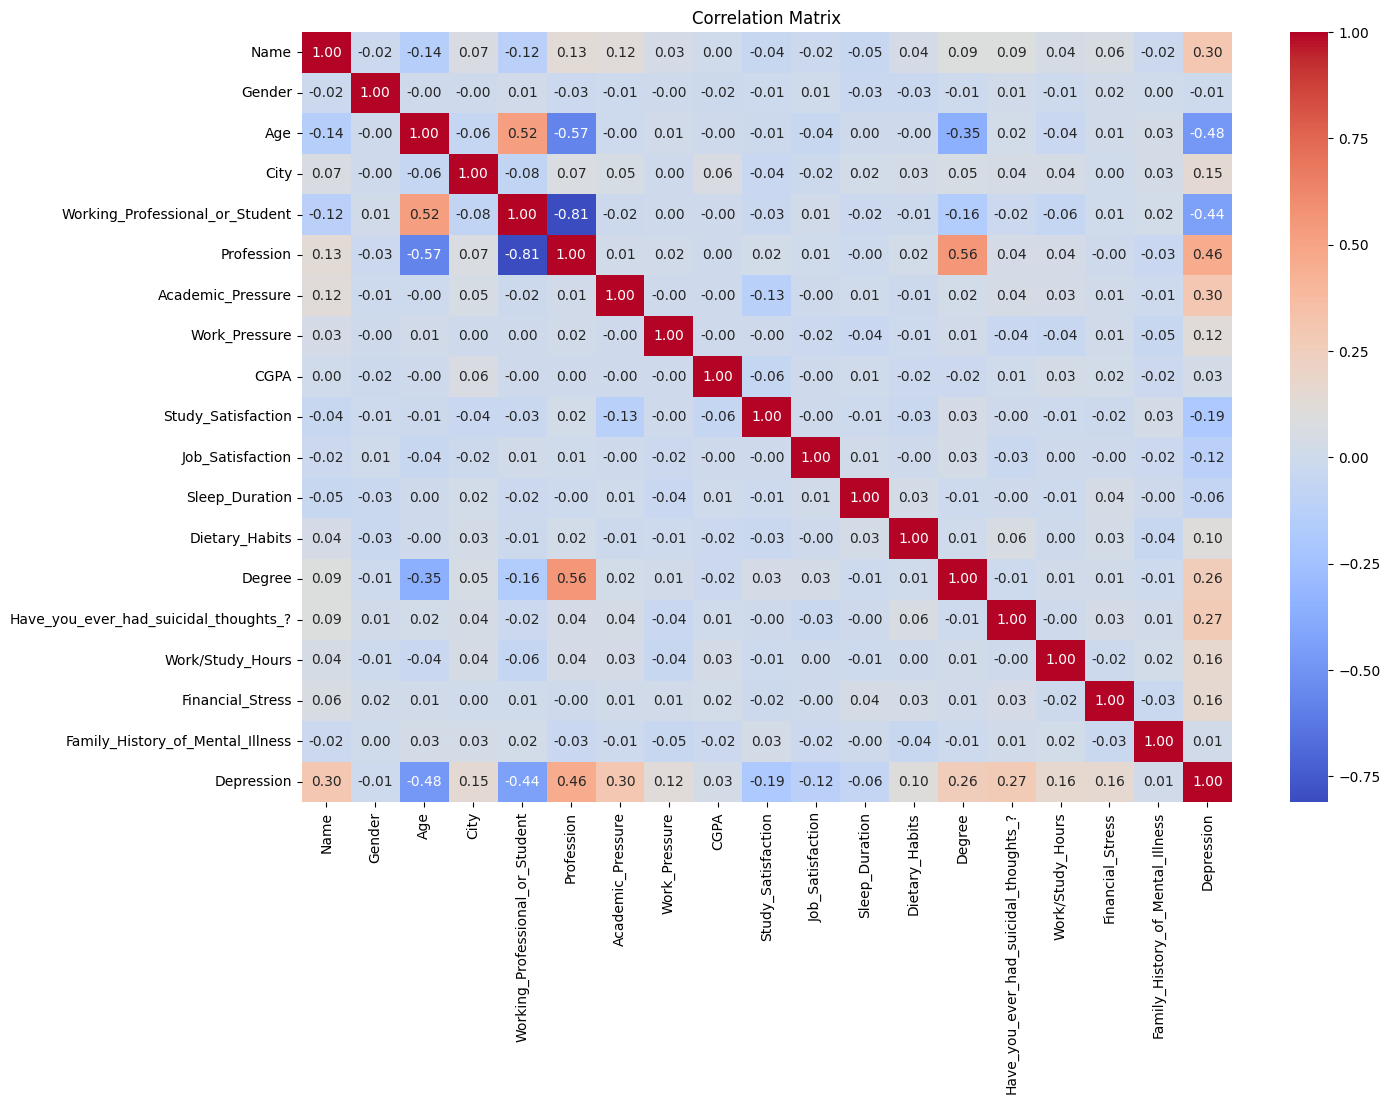

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Обучение

In [28]:
train_data = train_data.drop(TARGET, axis=1)

X_train, X_val, y_train, y_val = train_test_split(train_data, y, test_size=0.2, random_state=42)

def train_and_evaluate(model, param_grid, X_train, y_train, X_val, y_val, model_name):
    grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val)
    f1 = f1_score(y_val, y_pred)

    print(f"--- {model_name} ---")
    print("Best Parameters:", grid_search.best_params_)
    print("F1 Score on Validation Set:", f1)

    return best_model, f1, grid_search.best_params_

param_grid_lr = {
    'C': [10, 50, 100],
    'solver': ['saga', 'liblinear'],
    'max_iter': [1000000]
}
best_model_lr, f1_lr, params_lr = train_and_evaluate(LogisticRegression(random_state=42), param_grid_lr, X_train, y_train, X_val, y_val, "Logistic Regression")

param_grid_knn = {
    'n_neighbors': [4, 5, 6],
    'weights': ['uniform', 'distance']
}
best_model_knn, f1_knn, params_knn = train_and_evaluate(KNeighborsClassifier(), param_grid_knn, X_train, y_train, X_val, y_val, "K-Nearest Neighbors")


param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3]
}
best_model_dt, f1_dt, params_dt = train_and_evaluate(DecisionTreeClassifier(random_state=42), param_grid_dt, X_train, y_train, X_val, y_val, "Decision Tree")

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}
best_model_rf, f1_rf, params_rf = train_and_evaluate(RandomForestClassifier(random_state=42), param_grid_rf, X_train, y_train, X_val, y_val, "Random Forest")


Fitting 3 folds for each of 6 candidates, totalling 18 fits
--- Logistic Regression ---
Best Parameters: {'C': 100, 'max_iter': 1000000, 'solver': 'saga'}
F1 Score on Validation Set: 0.9777777777777777
Fitting 3 folds for each of 6 candidates, totalling 18 fits
--- K-Nearest Neighbors ---
Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
F1 Score on Validation Set: 0.6666666666666666
Fitting 3 folds for each of 45 candidates, totalling 135 fits
--- Decision Tree ---
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5}
F1 Score on Validation Set: 0.7638888888888888
Fitting 3 folds for each of 36 candidates, totalling 108 fits
--- Random Forest ---
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
F1 Score on Validation Set: 0.859375


### Получение результата

In [29]:
best_models = {
    "Logistic Regression": (best_model_lr, f1_lr, params_lr),
    "K-Nearest Neighbors": (best_model_knn, f1_knn, params_knn),
    "Decision Tree": (best_model_dt, f1_dt, params_dt),
    "Random Forest": (best_model_rf, f1_rf, params_rf)
}

best_model_name = max(best_models, key=lambda k: best_models[k][1])
best_model, best_f1, best_params = best_models[best_model_name]

print("\n--- Final Results ---")
print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_params}")
print(f"F1 Score on Validation Set: {best_f1}")

test_predictions = best_model.predict(test_data)
probabilities = best_model.predict_proba(test_data)
positive_class_probabilities = probabilities[:, 1]
uncertainty_threshold = 0.15
uncertain_indices = np.where(
    (positive_class_probabilities > (0.5 - uncertainty_threshold)) &
    (positive_class_probabilities < (0.5 + uncertainty_threshold))
)[0]

if len(uncertain_indices) > 0:
    counter = 1
    print("\nUncertain Predictions and Probabilities:")
    for i in uncertain_indices:
        print(f"{counter}). Entry ID{i+1}: Probability = {positive_class_probabilities[i]:.4f}")
        counter += 1
else:
    print("\nNo uncertain predictions found within the defined threshold.")

submission = pd.DataFrame({ID: test_ids, TARGET: test_predictions})


--- Final Results ---
Best Model: Logistic Regression
Best Parameters: {'C': 100, 'max_iter': 1000000, 'solver': 'saga'}
F1 Score on Validation Set: 0.9777777777777777

Uncertain Predictions and Probabilities:
1). Entry ID5: Probability = 0.6376
2). Entry ID19: Probability = 0.6137
3). Entry ID117: Probability = 0.6401
4). Entry ID138: Probability = 0.6073
5). Entry ID159: Probability = 0.3693
6). Entry ID295: Probability = 0.6429
7). Entry ID367: Probability = 0.4040
8). Entry ID409: Probability = 0.3699
9). Entry ID425: Probability = 0.3692
10). Entry ID491: Probability = 0.6415
11). Entry ID495: Probability = 0.3850
12). Entry ID497: Probability = 0.6015
13). Entry ID573: Probability = 0.4092
14). Entry ID582: Probability = 0.5831
15). Entry ID585: Probability = 0.6442


In [30]:
def swap_depression_for_ids(submission_df, id_list):

    submission_df.loc[(submission_df['id'].isin(id_list)), 'Depression'] = \
        1 - submission_df.loc[(submission_df['id'].isin(id_list)), 'Depression']

    return submission_df

ids_to_swap = [585, 342] #585, 342
#submission = swap_depression_for_ids(submission, ids_to_swap)
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

Submission file created successfully!


In [31]:
submission.head(10)

,id,Depression
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,0
6,7,0
7,8,1
8,9,0
9,10,0


In [32]:
depression_counts_groupby = submission.groupby('Depression')['id'].count()  # Count 'id' within each 'Depression' group
print(depression_counts_groupby)

Depression
0    547
1    118
Name: id, dtype: int64
